In [1]:
from pylab import *


from matplotlib import rc
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'serif': ['Computer Modern'],
        'weight' : 'bold',
        'size'   : 28}

sfont = {'family' : 'serif',
        'serif': ['Computer Modern'],
        'weight' : 'bold',
        'size'   : 20}

ssfont = {'family' : 'serif',
        'serif': ['Computer Modern'],
        'weight' : 'bold',
        'size'   : 16}

rc('font', **font)
rc('text', usetex=True)
rc('text.latex', preamble=r'\boldmath')

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [2]:
def Hoti_Hamiltonian(γ, λ,x,y,f,d, ϵ=0.0,δ=1e-3, conection=False):
    #x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
    r = 1.1
    Dic = {}
    natoms = int( len(x) )
    for n in range(natoms):
        a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r 
        vecinos = [i for i, x in enumerate(a) if x and i!=n]
        Dic[n] = vecinos
        
    r = max(x) - 0.1
    Dic_further = {}
    for n in range(natoms):
        a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) > r
        vecinos = [i for i, j in enumerate(a) if j and (x[n]==x[i] or y[n]==y[i])]
        Dic_further[n] = vecinos
        
    H = np.zeros((natoms,natoms), dtype = 'complex')
    Hop = {}
    a = exp(-1J*pi)
    
    for n in Dic.keys():
        vecinos = Dic[n]
        hop = []
        for v in vecinos:
            f0 = f[n]
            f1 = f[v]
            
            if f0 == f1:
                fase = γ
            else: 
                fase = λ
            
            H[n,v] = fase 
            H[v,n] = fase 
            
            
            hop.append(fase)
        Hop[n] = hop

    f0 = 0
    f1 = 0
    fase = 1
    for n in Dic.keys():
        vecinos = Dic[n]
        for v in vecinos:
            posx     = x[n]
            posy     = y[n]
            f0       = f[n]
            f1       = f[v] 
            if f0 == f1:
                fase = γ
            else: 
                fase = λ
                
            if ( posy%2==0  ):
                  if ( x[v] > x[n] ):
                    H[n,v] = -fase 
                    H[v,n] = -fase 
            else:
                pass
    
    if conection : 
        #print('some')
        for n in Dic_further.keys():
            vecinos = Dic_further[n]
            for v in vecinos:
                posx   = x[n]
                posy   = y[n]
                fase   = λ
                H[n,v] = fase 
                H[v,n] = fase 

                if(posy%2==1):
                    if ( x[v] < x[n] ):
                        H[n,v] = a*fase 
                        H[v,n] = a*fase 
                else:
                    pass
                
    H_delta = δ*array(d)
    H_delta = diag(resize(H_delta,natoms), k=0)

     
    return H + H_delta
    #print(H)

In [3]:
def Draw_Model(x,y,f,name,lw=1,ms=5):
    r = 1.1
    Dic = {}
    natoms = int( len(x) )
    for n in range(natoms):
        a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
        vecinos = [i for i, x in enumerate(a) if x and i!=n]
        Dic[n] = vecinos
        
    H = np.zeros((natoms,natoms))
    
    γ = 1
    λ = 4.5
    for n in Dic.keys():
        vecinos = Dic[n]
        for v in vecinos:
            f0 = f[n]
            f1 = f[v]
            if f0 == f1:
                fase = γ
            else: 
                fase = λ
            H[n,v] = fase
            H[v,n] = fase

    f0 = 0
    f1 = 0
    fase = 1
    for n in Dic.keys():
        vecinos = Dic[n]
        for v in vecinos:
            posx     = x[n]
            posy     = y[n]
            f0       = f[n]
            f1       = f[v] 
            if f0 == f1:
                fase = γ
            else: 
                fase = λ

                
            if ( posy%2==0  ):
                  if ( x[v] > x[n] ):
                    H[n,v] = -fase 
                    H[v,n] = -fase 
            #elif(posx%2==1 and posy%2==1):
               # if ( x[v] > x[n] ):
              #      H[n,v] = a*fase 
             #       H[v,n] = a*fase 
            else:
                pass
            
    Hop = {}
    for i in Dic.keys():
        Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]
        
        
    Rx = []
    Ry = []
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Rx.append(rx)
        Ry.append(ry)
    
    fig, ax = plt.subplots(figsize=(6,6))
   

    boxes = []
    for i in range(len(Rx)):
        rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
        boxes.append(rect)
    for i in Dic.keys():
        c = 0
        for v in Dic[i]:
            if Hop[i][c] == 1:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = lw)
            elif Hop[i][c] == -1:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = lw, ls = ':')
            elif Hop[i][c] == 4.5:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = lw)
            elif Hop[i][c] == -4.5:
                ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = lw, ls = ':')
            c+=1  


    ax.plot(x,y, marker='o', color='black', markersize=ms,linestyle="")
    pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
    ax.add_collection(pc)
    fig.tight_layout()
    ax.set_aspect('equal')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis("off")
    fig.tight_layout()
    fig.savefig('{}.pdf'.format(name))
    return(fig,ax)

## Figures SSH model

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

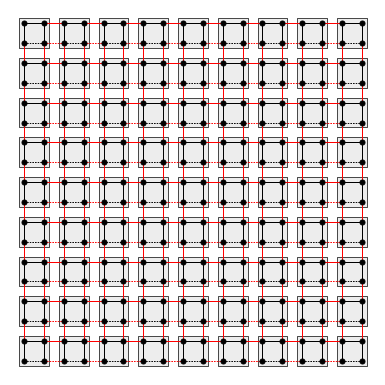

In [4]:
x,y,f = np.loadtxt("array_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
Draw_Model(x,y,f,'square_hoti_model')

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

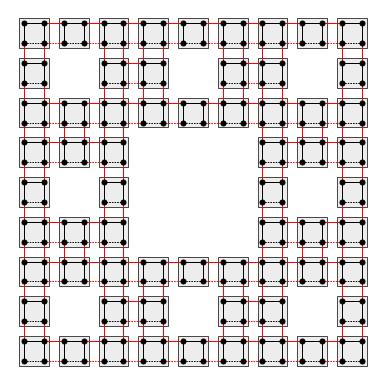

In [5]:
x,y,f = np.loadtxt("LatticeSierpinski_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
Draw_Model(x,y,f,'fractal_hoti_model')

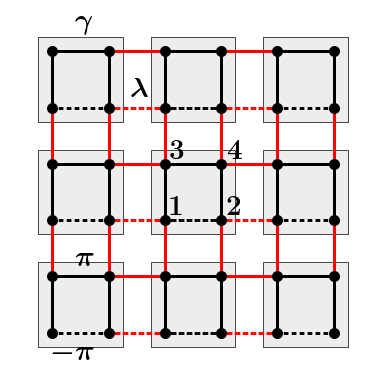

In [6]:
x,y,f = np.loadtxt("array_6x6.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
fig,ax = Draw_Model(x,y,f,'square_hoti_model6',lw=3,ms=10)

ax.set_ylim((-0.8,5.8))
ax.set_xlim((-0.8,5.8))

ax.text(0.4,5.4,'$\gamma$')
ax.text(1.4,4.2,'$\lambda$')

ax.text(0.4,1.2,'$\pi$')
ax.text(0.0,-0.4,'$-\pi$')

ax.text(2.1,3.1,'$3$')
ax.text(3.1,3.1,'$4$')
ax.text(2.1,2.1,'$1$')
ax.text(3.1,2.1,'$2$')

fig.savefig('square_hoti_model6.pdf')

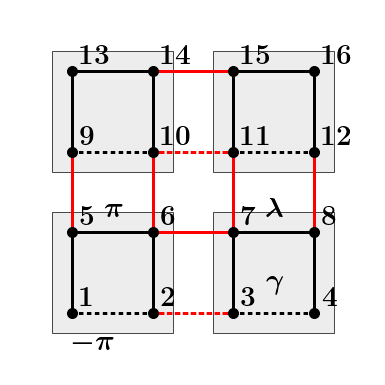

In [7]:
x,y,f = np.loadtxt("array_4x4.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
fig,ax = Draw_Model(x,y,f,'square_hoti_model6',lw=3,ms=10)

ax.set_ylim((-0.8,3.8))
ax.set_xlim((-0.8,3.8))

ax.text(2.4,0.3,'$\gamma$')
ax.text(2.4,1.2,'$\lambda$')

ax.text(0.4,1.2,'$\pi$')
ax.text(0.0,-0.4,'$-\pi$')


ax.text(3.1,0.1,'$4$')
ax.text(2.1,0.1,'$3$')
ax.text(1.1,0.1,'$2$')
ax.text(0.1,0.1,'$1$')

ax.text(3.1,1.1,'$8$')
ax.text(2.1,1.1,'$7$')
ax.text(1.1,1.1,'$6$')
ax.text(0.1,1.1,'$5$')

ax.text(3.1,2.1,'$12$')
ax.text(2.1,2.1,'$11$')
ax.text(1.1,2.1,'$10$')
ax.text(0.1,2.1,'$9$')

ax.text(3.1,3.1,'$16$')
ax.text(2.1,3.1,'$15$')
ax.text(1.1,3.1,'$14$')
ax.text(0.1,3.1,'$13$')

fig.savefig('square_hoti_model4.pdf')

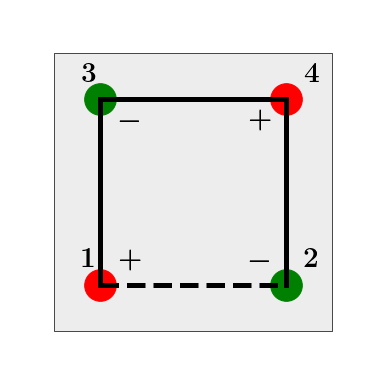

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

boxes = []
    
rect = Rectangle((-0.25, -0.25), 1.5,1.5)
boxes.append(rect)

pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)

x = [0,1,0,1]
y = [0,0,1,1]



ax.plot([0,1],[0,0], ls='--',lw=5,c='black')
ax.plot([0,0],[0,1],lw=5,c='black')
ax.plot([0,0],[0,1],lw=5,c='black')
ax.plot([0,1],[1,1],lw=5,c='black')
ax.plot([1,1],[0,1],lw=5,c='black')

ax.text(0.1,0.1,'$+$')
ax.text(0.1,0.9,'$-$')
ax.text(0.8,0.15,'$-$')
ax.text(0.8,0.85,'$+$')

for i in range(len(x)):
    if x[i] == y[i]:
        ax.scatter(x[i],y[i], color='Red' , s=1000)
    else:
        ax.scatter(x[i],y[i], color='green', s=1000 )
        

ax.text(-0.1,0.1,'$1$')
ax.text(1.1,0.1,'$2$')
ax.text(1.1,1.1,'$4$')
ax.text(-0.1,1.1,'$3$')

ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_aspect('equal')
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")
fig.tight_layout()
fig.savefig('{}.pdf'.format('unitary_cell'))

## SSH Model

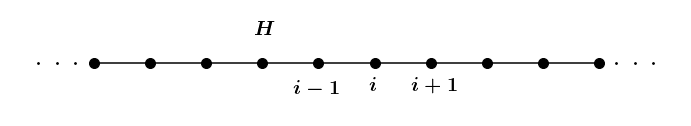

In [9]:
#Hidrogen chain 
rc('font', **sfont)

x = arange(10)
y = zeros(len(x))

dx = arange(3)/3
dy = zeros(len(dx))
#plt.rc('font', size=SMALL_SIZE)  

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(x,y,c='black')
ax.scatter(x,y,c='black',s=100)

ax.scatter(dx-1,dy, c='black',s=3)
ax.scatter(dx+9.3,dy, c='black',s=3)

ax.text(4.9,-0.5,'$i$')
ax.text(3.55,-0.5,'$i-1$')
ax.text(5.65,-0.5,'$i+1$')

ax.text(2.85,0.5,'$H$')


#fig.tight_layout()
ax.set_aspect('equal')
ax.set_ylim((-1,1))
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")
fig.tight_layout()
fig.savefig("TB_example.pdf")


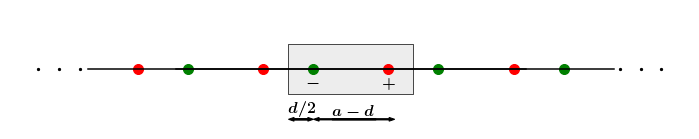

In [10]:
#Hidrogen chain 
rc('font', **ssfont)

x = arange(8)
y = zeros(len(x))

dx = arange(3)/3
dy = zeros(len(dx))
#plt.rc('font', size=SMALL_SIZE)  

fig, ax = plt.subplots(figsize=(10,4))

boxes = []
rect = Rectangle((2.5, -0.4), 2,0.8)
#rect1 = Rectangle((-0.25, -0.4), 1.5,0.8)
#rect2 = Rectangle((3.75, -0.4), 1.5,0.8)
#rect3 = Rectangle((5.75, -0.4), 1.5,0.8)

boxes.append(rect)#;boxes.append(rect1);boxes.append(rect2);boxes.append(rect3)
pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)

ax.plot(x-0.7,y,c='black')
ax.plot(x+0.7,y,c='black')

ax.scatter(x[x%2==0]+0.1,y[x%2==0],c='r',s=100)
ax.scatter(x[x%2==1]-0.1,y[x%2==1],c='g',s=100)

ax.arrow(3.2, -0.8, 1, 0, width=.02, color='black',length_includes_head=True)
ax.arrow(3.9, -0.8, -1, 0, width=.02, color='black',length_includes_head=True)

ax.arrow(2.8, -0.8, -0.3, 0, width=.02, color='black',length_includes_head=True)
ax.arrow(2.6, -0.8, 0.3, 0, width=.02, color='black',length_includes_head=True)

ax.scatter(dx-1.5,dy, c='black',s=5)
ax.scatter(dx+7.8,dy, c='black',s=5)

#ax.text(1.9,-0.4,'$A$')
#ax.text(2.9,-0.4,'$B$')

ax.text(3.2,-0.7,'$a-d$')
ax.text(2.5,-0.7,'$d/2$')

ax.text(2.8,-0.2,'$-$')
ax.text(4.0,-0.3,'$+$')

#fig.tight_layout()
ax.set_aspect('equal')
ax.set_ylim((-1,1))
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")
fig.tight_layout()
fig.savefig("polarizatio_example_b.pdf")


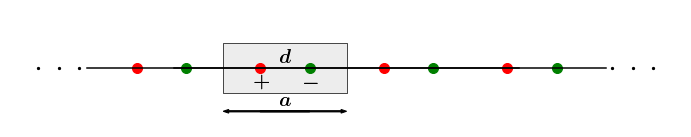

In [11]:
#Hidrogen chain 
rc('font', **sfont)

x = arange(8)
y = zeros(len(x))

dx = arange(3)/3
dy = zeros(len(dx))
#plt.rc('font', size=SMALL_SIZE)  

fig, ax = plt.subplots(figsize=(10,4))

boxes = []
rect = Rectangle((1.5, -0.4), 2,0.8)
#rect1 = Rectangle((-0.25, -0.4), 1.5,0.8)
#rect2 = Rectangle((3.75, -0.4), 1.5,0.8)
#rect3 = Rectangle((5.75, -0.4), 1.5,0.8)

boxes.append(rect)#;boxes.append(rect1);boxes.append(rect2);boxes.append(rect3)
pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)

ax.plot(x-0.7,y,c='black')
ax.plot(x+0.7,y,c='black')

ax.scatter(x[x%2==0]+0.1,y[x%2==0],c='r',s=100)
ax.scatter(x[x%2==1]-0.1,y[x%2==1],c='g',s=100)

ax.arrow(2.1, -0.7, 1.4, 0, width=.02, color='black',length_includes_head=True)
ax.arrow(2.9, -0.7, -1.4, 0, width=.02, color='black',length_includes_head=True)

ax.scatter(dx-1.5,dy, c='black',s=5)
ax.scatter(dx+7.8,dy, c='black',s=5)

#ax.text(1.9,-0.4,'$A$')
#ax.text(2.9,-0.4,'$B$')

ax.text(2.4,-0.6,'$a$')
ax.text(2.4,0.1,'$d$')

ax.text(2.0,-0.3,'$+$')
ax.text(2.8,-0.2,'$-$')

#fig.tight_layout()
ax.set_aspect('equal')
ax.set_ylim((-1,1))
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")
fig.tight_layout()
fig.savefig("polarizatio_example_a.pdf")

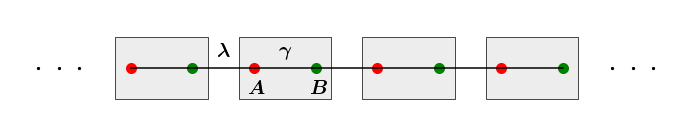

In [12]:
#Hidrogen chain 
rc('font', **sfont)

x = arange(8)
y = zeros(len(x))

dx = arange(3)/3
dy = zeros(len(dx))
#plt.rc('font', size=SMALL_SIZE)  

fig, ax = plt.subplots(figsize=(10,4))

boxes = []
rect = Rectangle((1.75, -0.5), 1.5,1)
rect1 = Rectangle((-0.25, -0.5), 1.5,1)
rect2 = Rectangle((3.75, -0.5), 1.5,1)
rect3 = Rectangle((5.75, -0.5), 1.5,1)

boxes.append(rect);boxes.append(rect1);boxes.append(rect2);boxes.append(rect3)
pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)

ax.plot(x,y,c='black')
ax.scatter(x[x%2==0],y[x%2==0],c='r',s=100)
ax.scatter(x[x%2==1],y[x%2==1],c='g',s=100)

ax.scatter(dx-1.5,dy, c='black',s=5)
ax.scatter(dx+7.8,dy, c='black',s=5)

ax.text(1.9,-0.4,'$A$')
ax.text(2.9,-0.4,'$B$')

ax.text(1.4,0.2,'$\lambda$')
ax.text(2.4,0.2,'$\gamma$')

#fig.tight_layout()
ax.set_aspect('equal')
ax.set_ylim((-1,1))
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")
fig.tight_layout()
fig.savefig("SSH_example.pdf")


In [13]:


def Draw_model_pump(name_array, step, direction, name):
    #step = 17
    #name_array = 'array_18x18.xyz'
    
    import os

    if not os.path.exists("images_{}".format(name)):
        os.mkdir("images_{}".format(name))


    δ = 1e-3
    C   = 1.0     # cm^-1
    κ   = 1    # μm^-1
    L   = 1   # μm
    A   = 0.5     # μm
    γ,λ = 0.5,0.5

    def func_cext1(θ,γ = 1.0, λ = 1.0):
        return  λ*exp(-κ*(L+A*cos(θ)))

    def func_cint1(θ,γ = 1.0, λ = 1.0):
        return γ*exp(-κ*(L-A*cos(θ)))



    x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
    ind = np.argsort(f)
    #x,y,f = x[ind], y[ind], f[ind]

    r = 1.05
    Dic_r = {}
    natoms = int( len(x) )
    for n in range(natoms):
        a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r 
        vecinos = [i for i, x in enumerate(a) if x and i!=n]
        Dic_r[n] = vecinos

    Hr = Hoti_Hamiltonian(1.0, 4.5,x,y,f,d, conection=False)

    Hop = {}
    for i in Dic_r.keys():
        Hop[i] = [real(Hr[i][j]) for j in range(len(Hr[i])) if Hr[i][j] != 0]
    count=0


    dic_x = {i : x[i] for i in range(len(x))}
    dic_y = {i : y[i] for i in range(len(y))}
    for θ in np.linspace(-pi,pi,step):
        Nx = []
        Ny = []
        cx = (np.amax(x) + np.amin(x))/2
        cy = (np.amax(y) + np.amin(y))/2

        for i in np.unique(f):
            find = [j for j,val in enumerate(f) if val == i]
            #print(find)
            X = [x[i] for i in find]
            Y = [y[i] for i in find]
            xmax = np.amax(X)
            xmin = np.amin(X)
            ymax = np.amax(Y)
            ymin = np.amin(Y)
            #print(X)
            #print(Y)
            if direction == 'xy':
                rx = ((xmax + xmin)/2 - cx)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cx 
                ry = ((ymax + ymin)/2 - cy)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cy

                X = func_cint1(θ,γ = 1.0, λ = 1.0)*(X - rx) + rx
                Y = func_cint1(θ,γ = 1.0, λ = 1.0)*(Y - ry) + ry
            elif direction == 'x':
                rx = ((xmax + xmin)/2 - cx)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cx 
                ry = ((ymax + ymin)/2 - cy)*λ/2 + cy

                X = func_cint1(θ,γ = 1.0, λ = 1.0)*(X - rx) + rx
                Y = γ*(Y - ry) + ry
            elif direction == 'y':
                rx = ((xmax + xmin)/2 - cx)*λ/2 + cx 
                ry = ((ymax + ymin)/2 - cy)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cy

                X = γ*(X - rx) + rx
                Y = func_cint1(θ,γ = 1.0, λ = 1.0)*(Y - ry) + ry

            for j in range(len(find)):
                dic_x[find[j]] = X[j]
                dic_y[find[j]] = Y[j]



        Rx = []
        Ry = []
        for i in np.unique(f):
            find = [j for j,val in enumerate(f) if val == i]
            X = [dic_x[i] for i in find]
            Y = [dic_y[i] for i in find]
            xmax = np.amax(X)
            xmin = np.amin(X)
            ymax = np.amax(Y)
            ymin = np.amin(Y)
            rx = (xmax + xmin)/2
            ry = (ymax + ymin)/2
            Rx.append(rx)
            Ry.append(ry)



        fig, ax = plt.subplots(1, figsize=(7,7))

        boxes = []
        for i in range(len(Rx)):
            rect = Rectangle((Rx[i]- 0.4, Ry[i] - 0.4), 0.8,0.8)
            boxes.append(rect)

        for i in Dic_r.keys():
            c = 0

            for v in Dic_r[i]:
                #print(Hop[i][c])
                if Hop[i][c] == 1:
                    ax.plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'black', lw = 1)
                elif Hop[i][c] == -1:
                    ax.plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'black', lw = 1, ls = ':')
                elif Hop[i][c] == 4.5:
                    ax.plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'r', lw =1)
                elif Hop[i][c] == -4.5:
                    ax.plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'r', lw =1, ls = ':')
                c+=1


        pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
        ax.add_collection(pc)
        #print(len(S_array))



        Nx = [i for i in dic_x.values()]
        Ny = [i for i in dic_y.values()]

        ax.scatter(Nx,Ny, s=50, alpha=0.8,c='black')


        fig.tight_layout()
        ax.set_aspect('equal')
        #ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(min(x)+2, max(x)-2)
        ax.set_ylim(min(y)+2, max(y)-2)
        ax.axis("off")
        

        fig.tight_layout()
        fig.savefig("images_{}/{}_{}.pdf".format(name,name,count))
        #fig.savefig('images/video_images2/hoti_pomp_{}.pdf'.format(count))
        #fig.savefig('images/video_images2/hoti_pomp_{}.png'.format(count))
        count+=1

        plt.show()

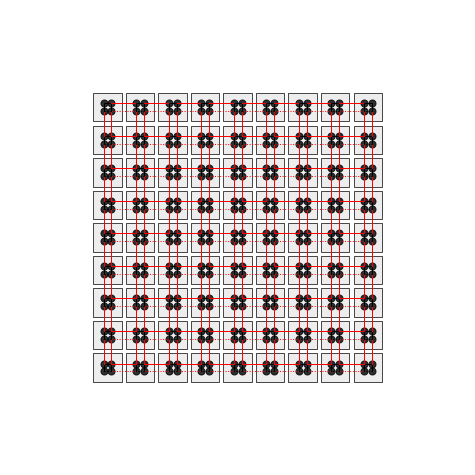

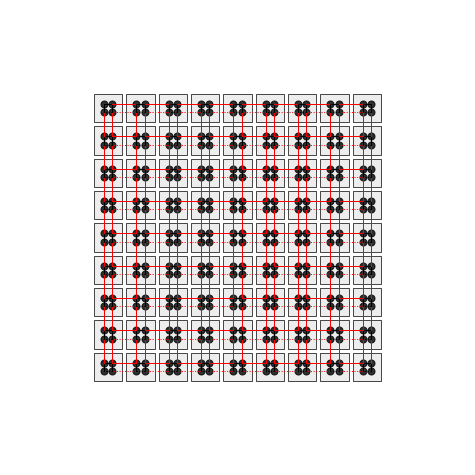

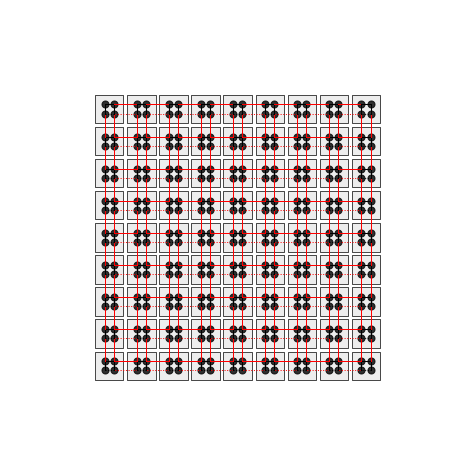

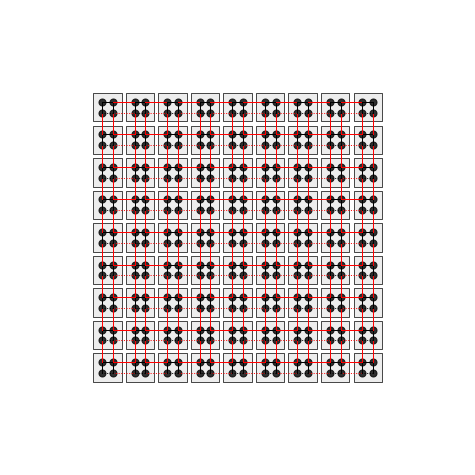

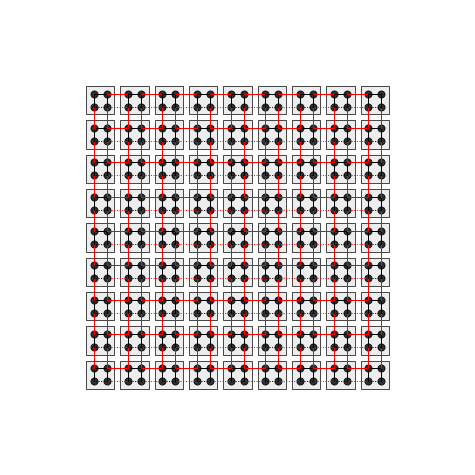

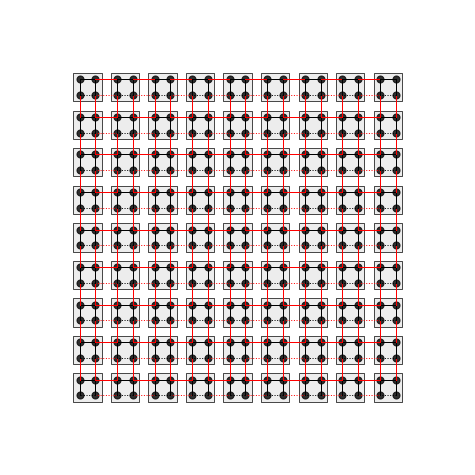

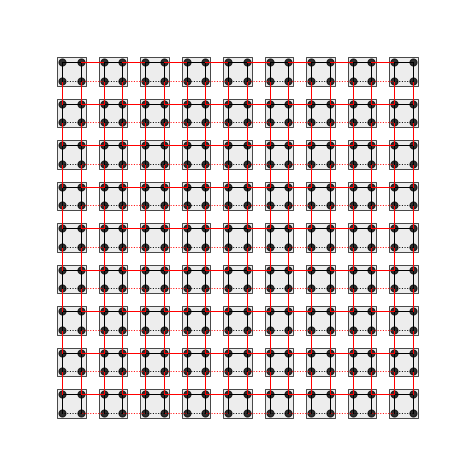

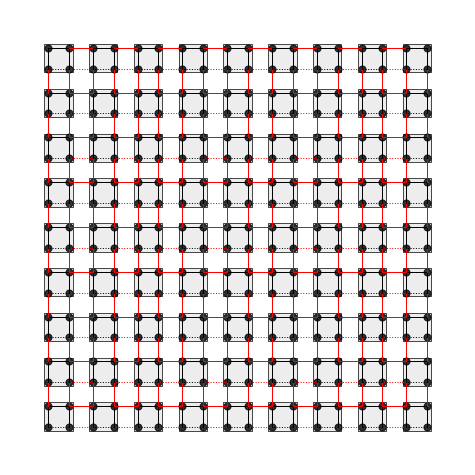

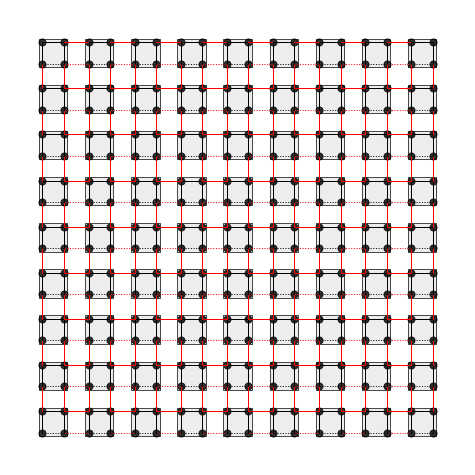

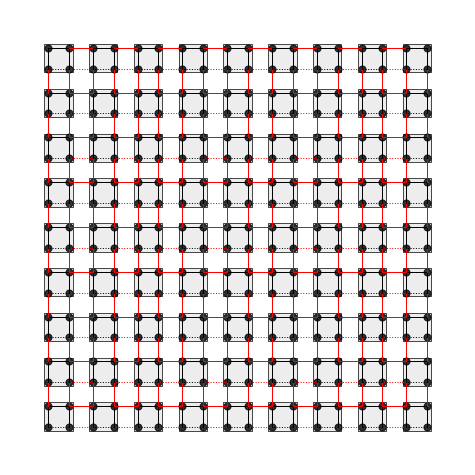

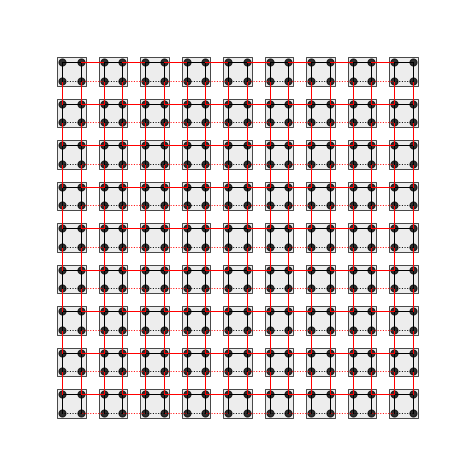

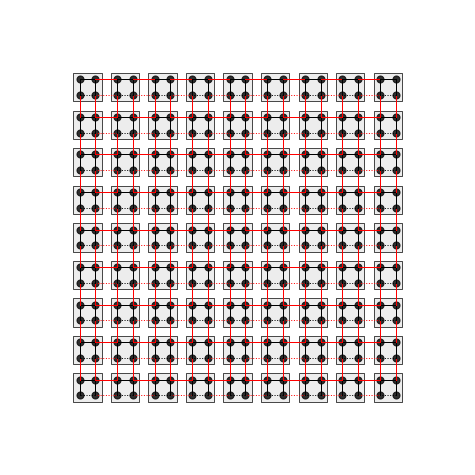

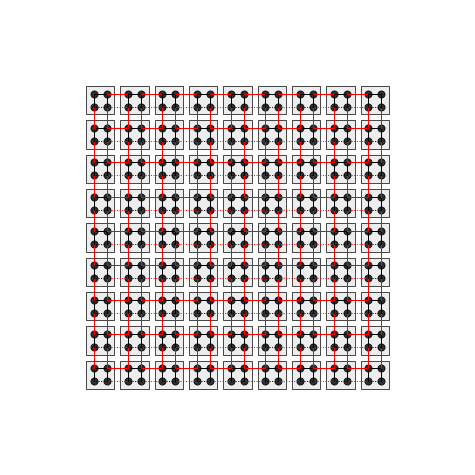

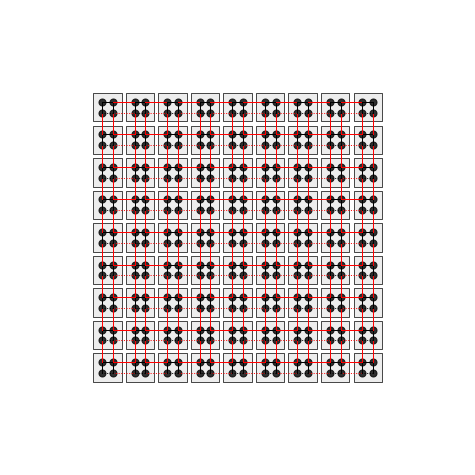

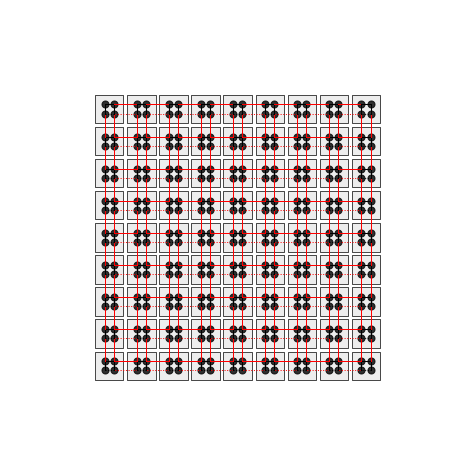

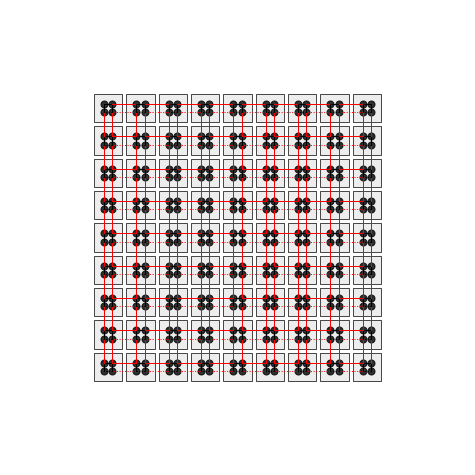

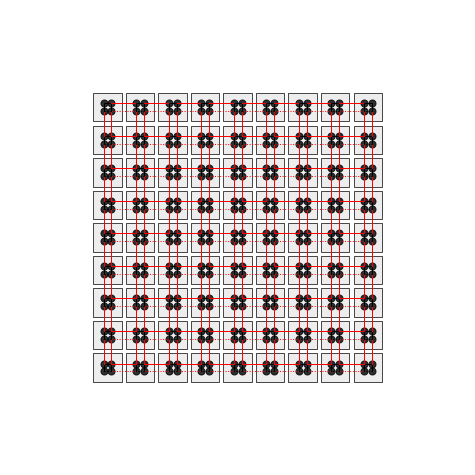

In [14]:
step = 17
name_array = 'array_18x18.xyz'
direction = 'xy'
name = 'square_pump_model_xy'
Draw_model_pump(name_array, step, direction, name)
    

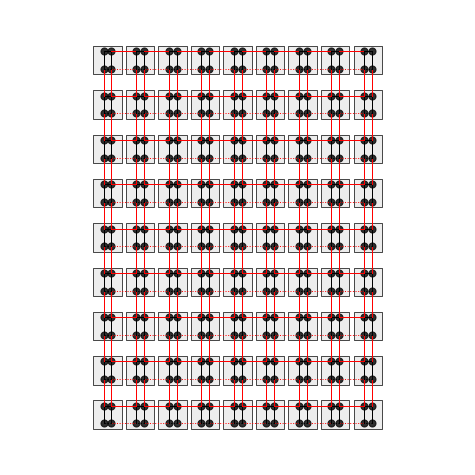

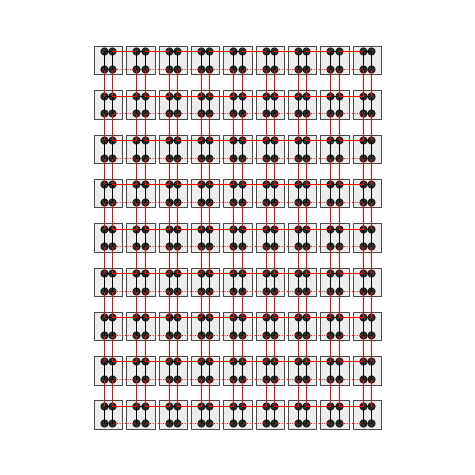

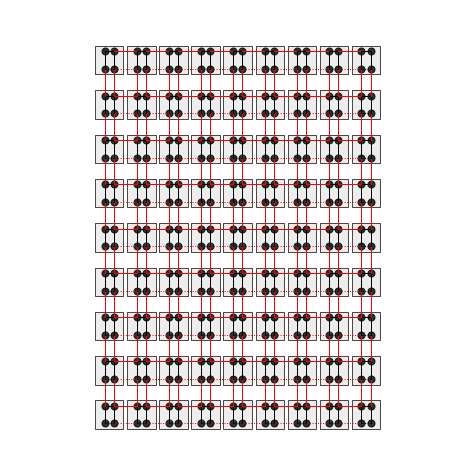

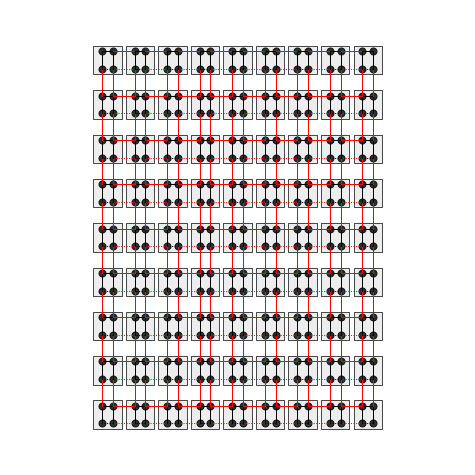

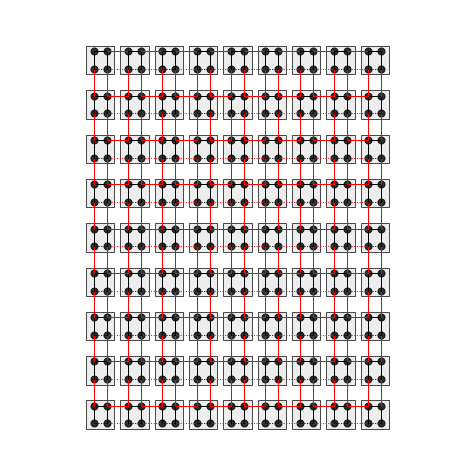

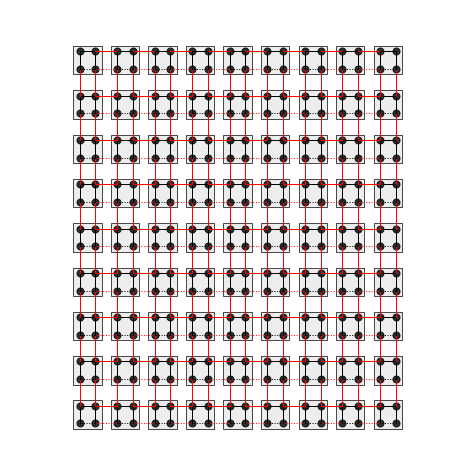

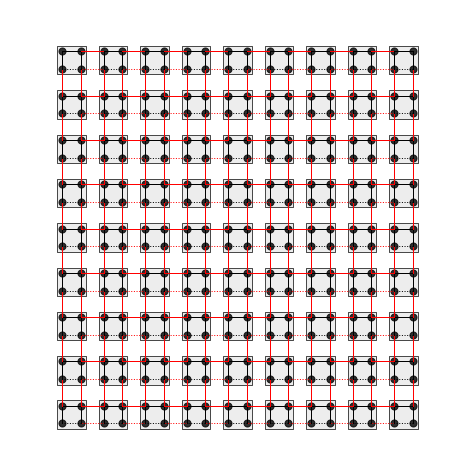

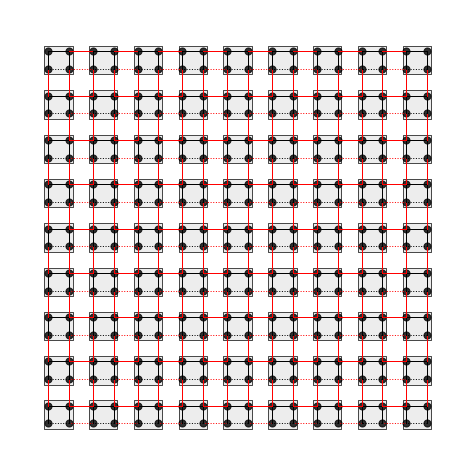

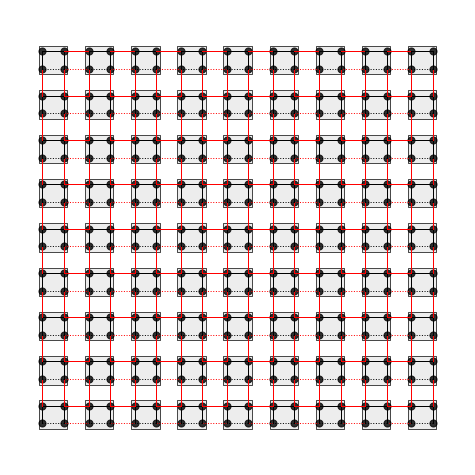

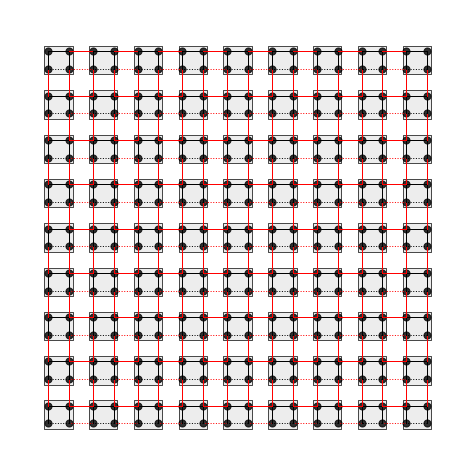

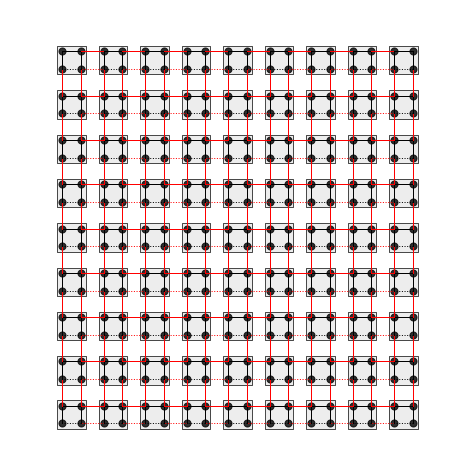

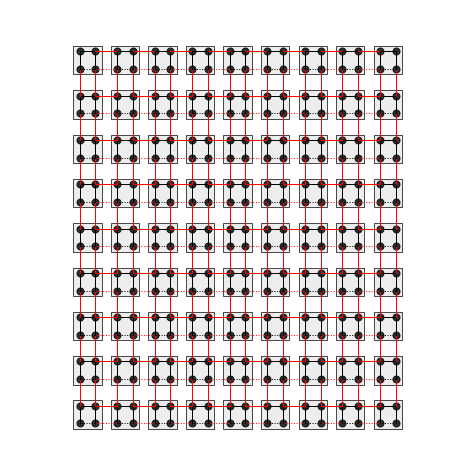

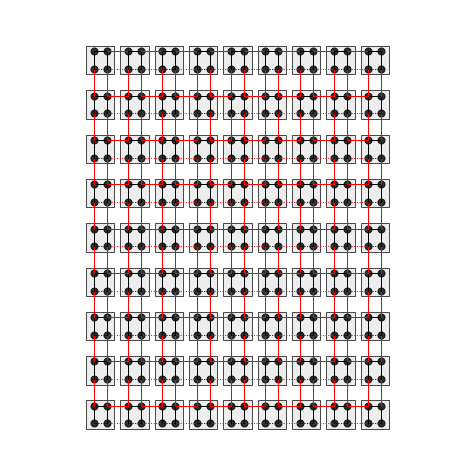

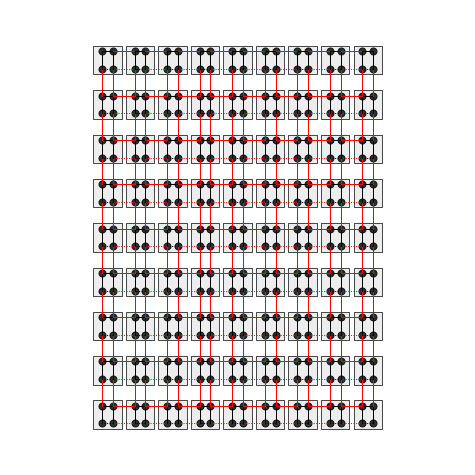

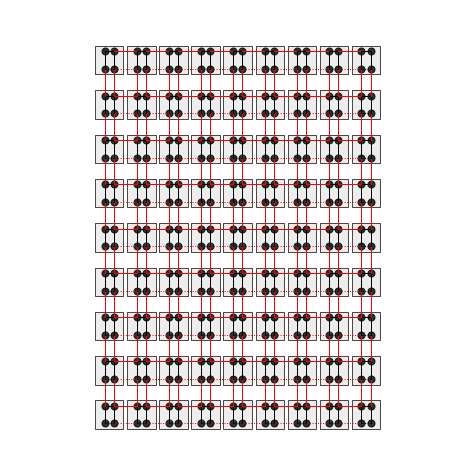

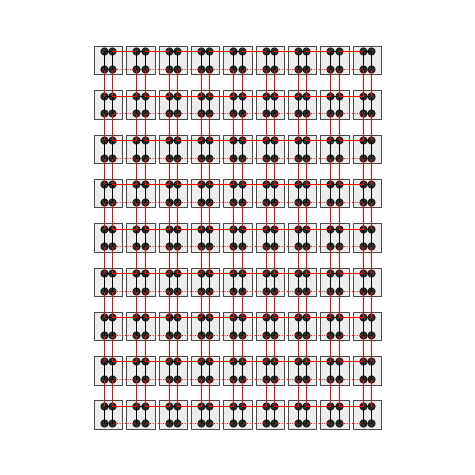

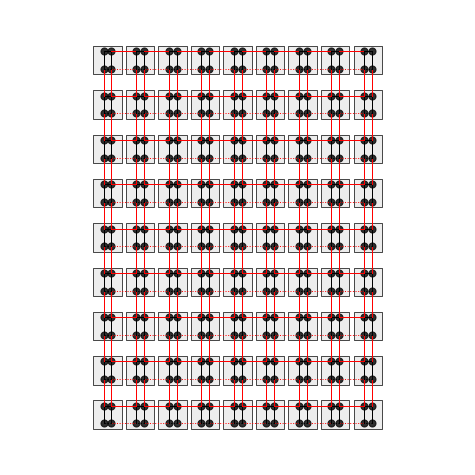

In [15]:
step = 17
name_array = 'array_18x18.xyz'
direction = 'x'
name = 'square_pump_model_x'
Draw_model_pump(name_array, step, direction, name)

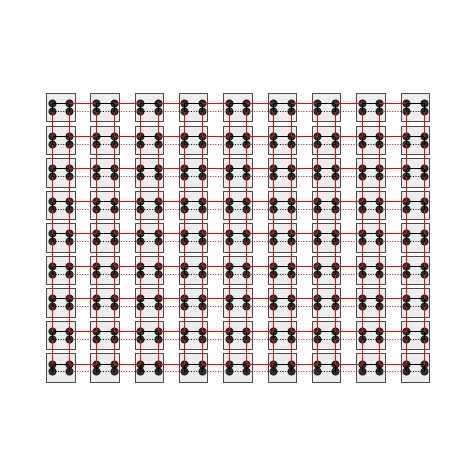

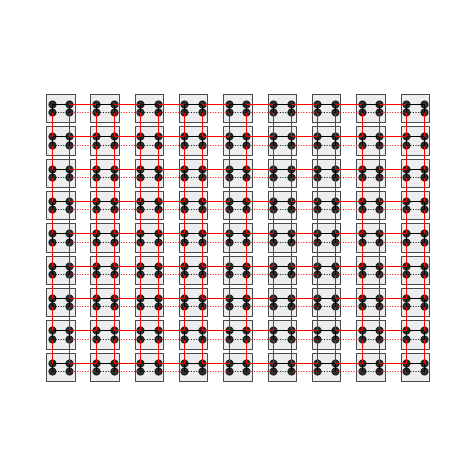

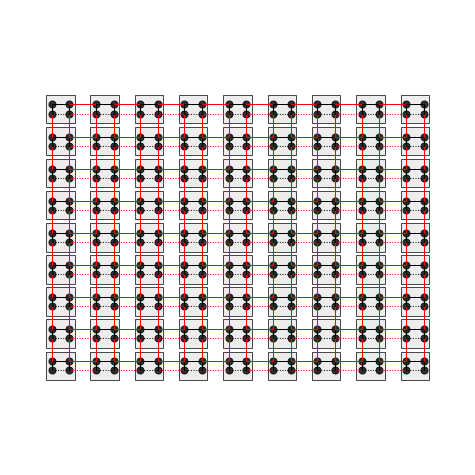

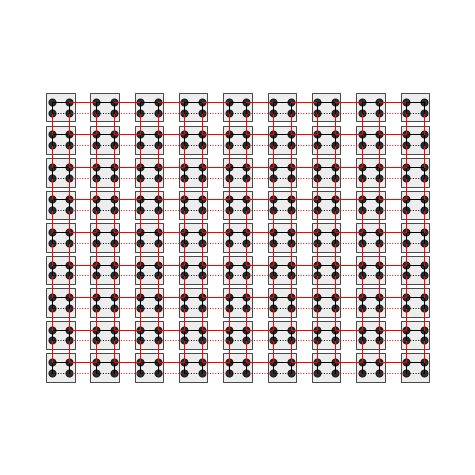

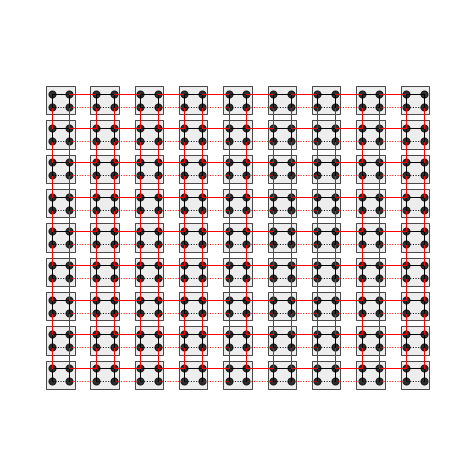

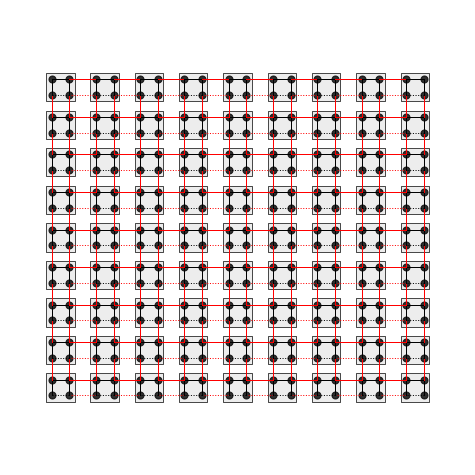

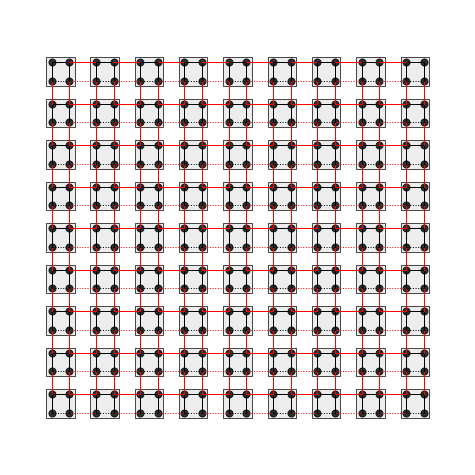

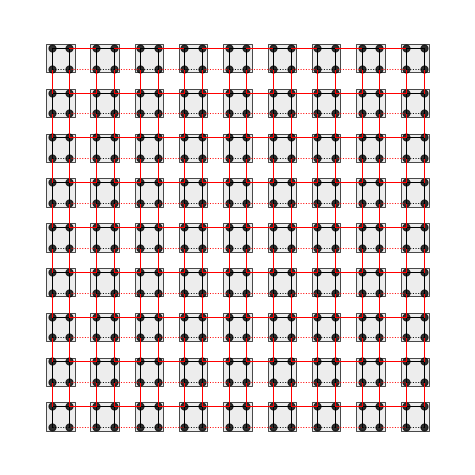

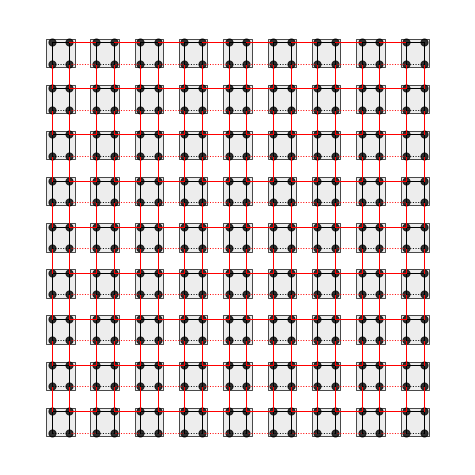

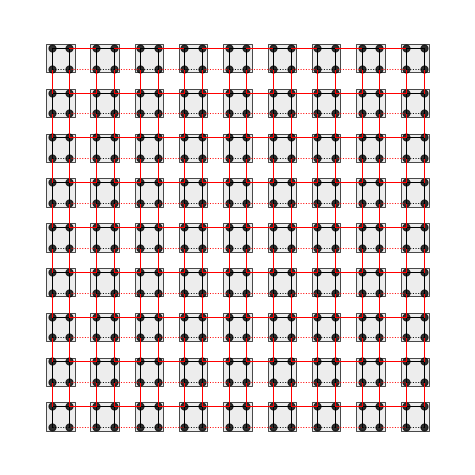

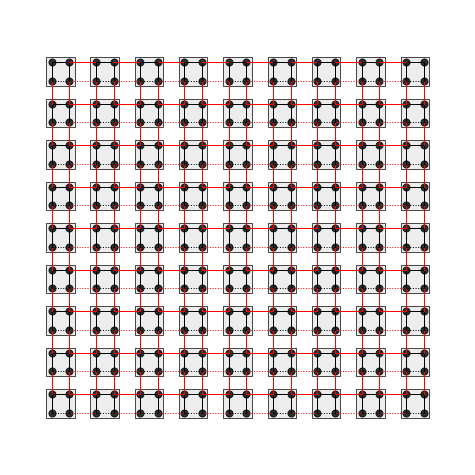

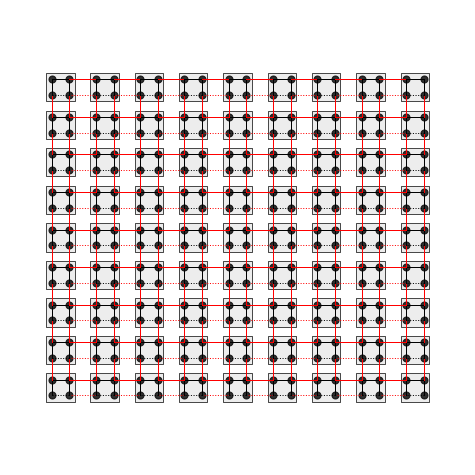

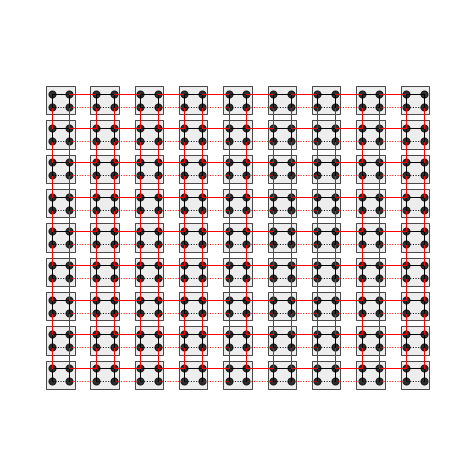

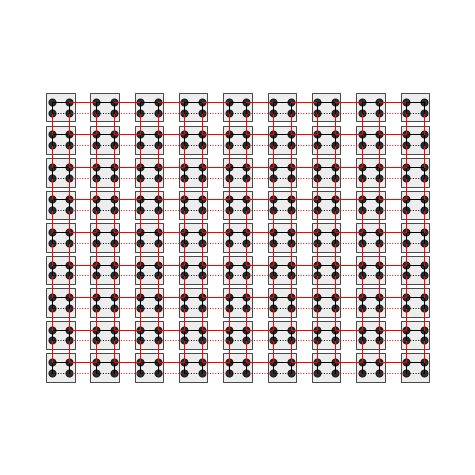

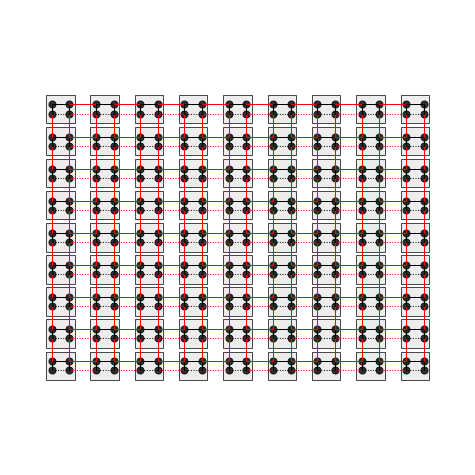

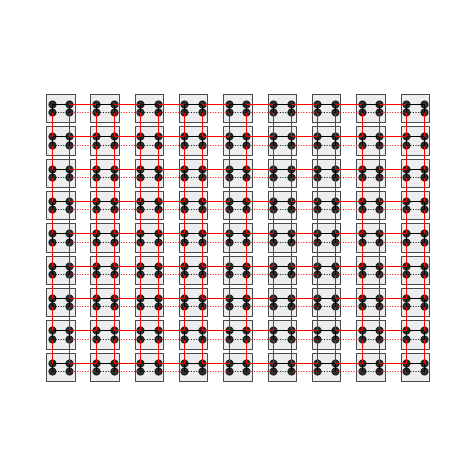

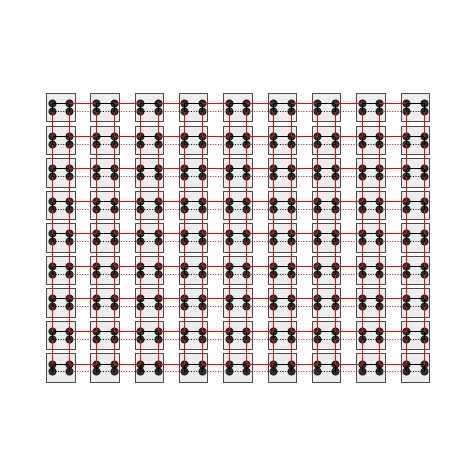

In [16]:
step = 17
name_array = 'array_18x18.xyz'
direction = 'y'
name = 'square_pump_model_y'
Draw_model_pump(name_array, step, direction, name)

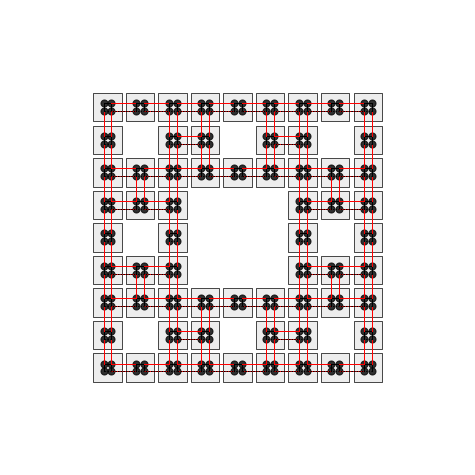

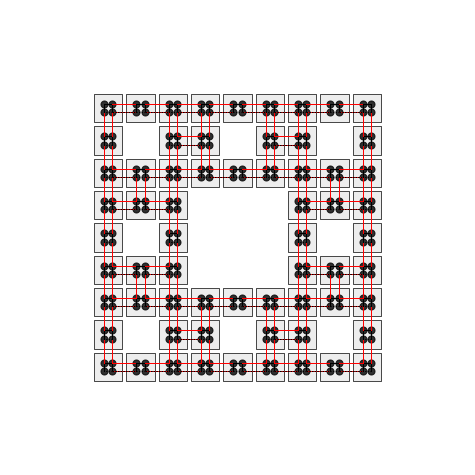

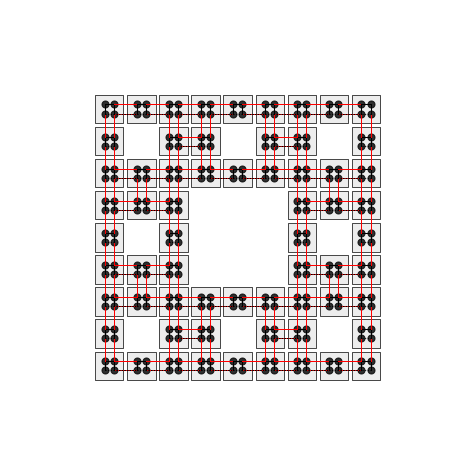

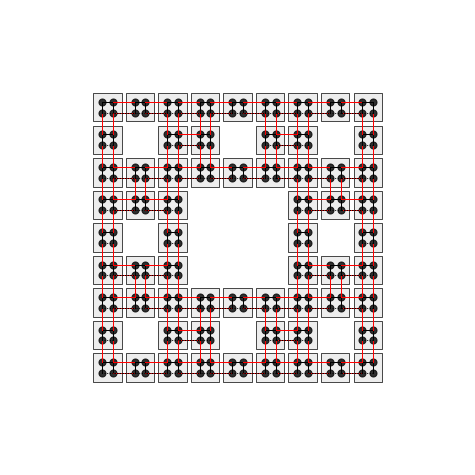

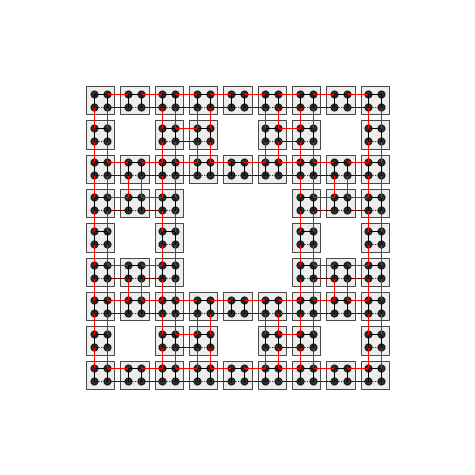

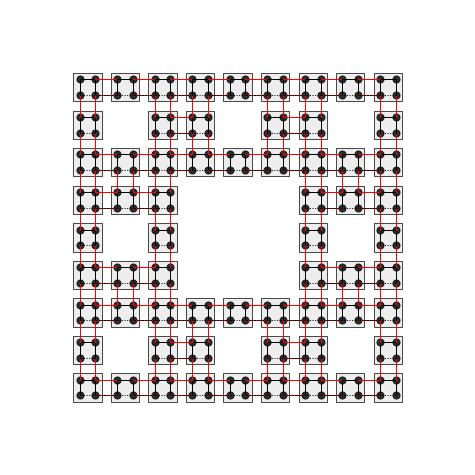

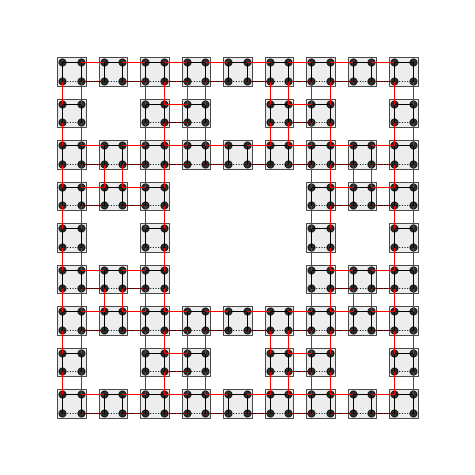

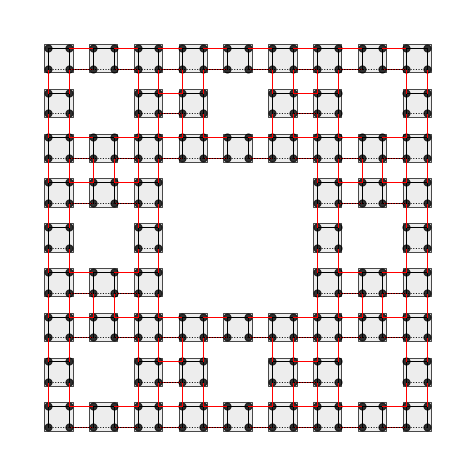

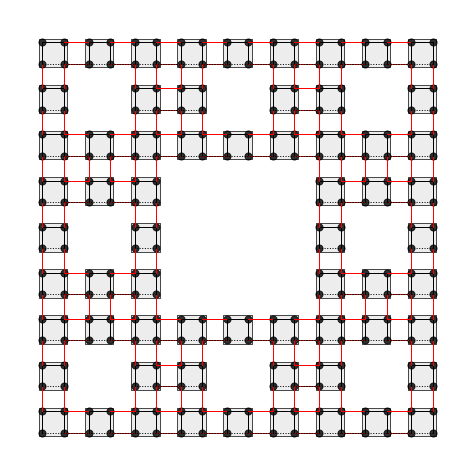

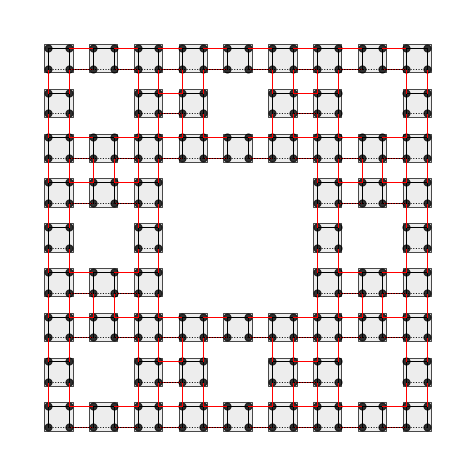

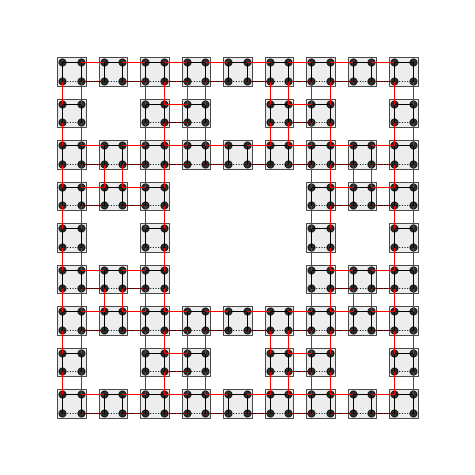

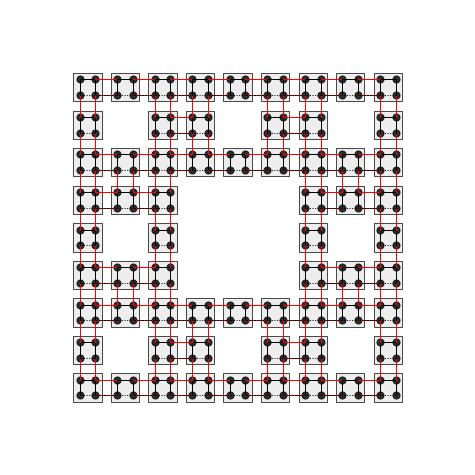

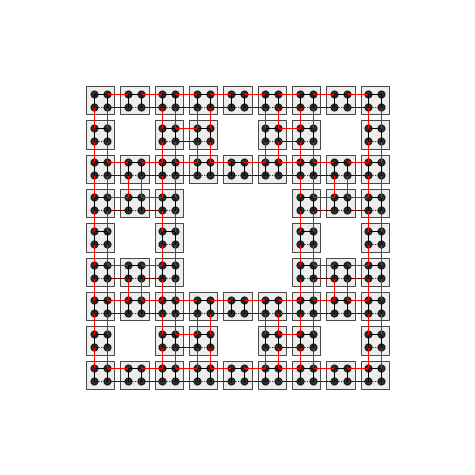

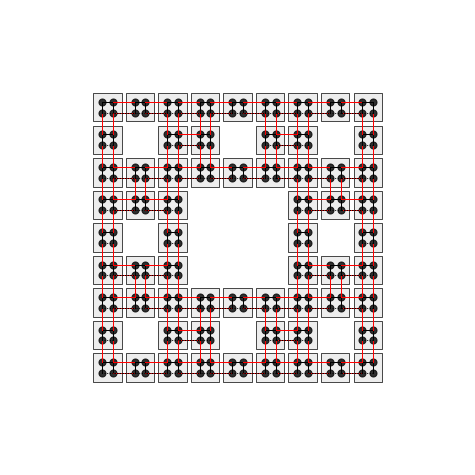

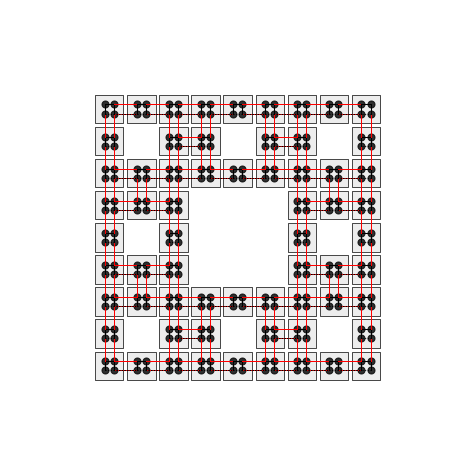

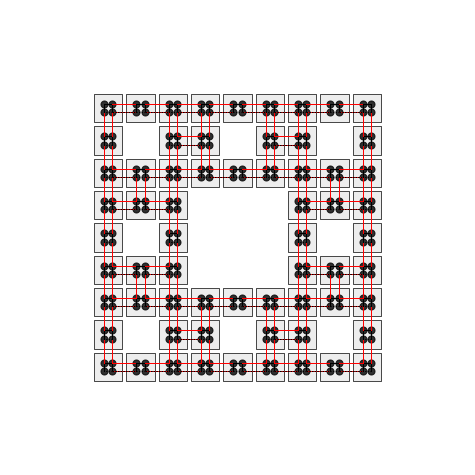

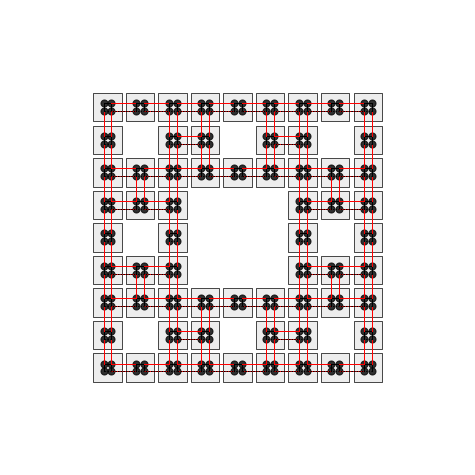

In [17]:
step = 17
name_array = 'LatticeSierpinski_18x18.xyz'
direction = 'xy'
name = 'fractal_pump_model_xy'
Draw_model_pump(name_array, step, direction, name)

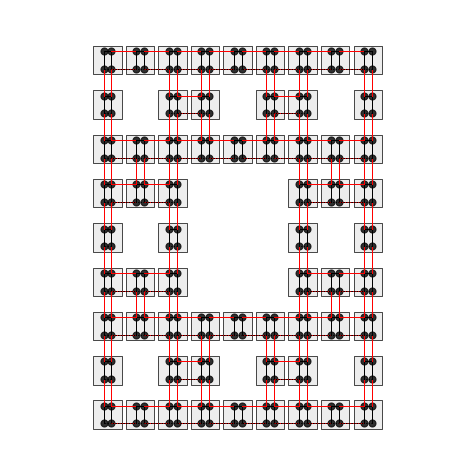

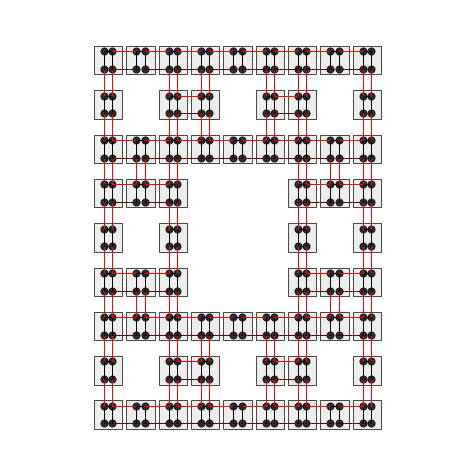

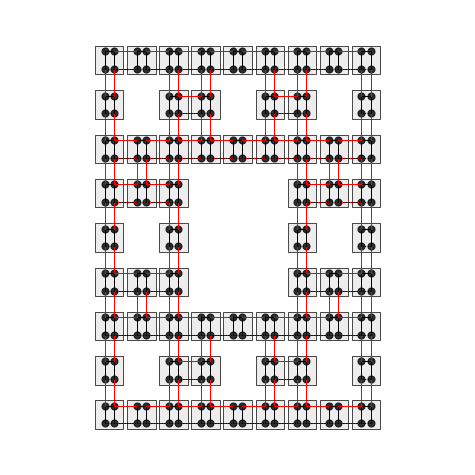

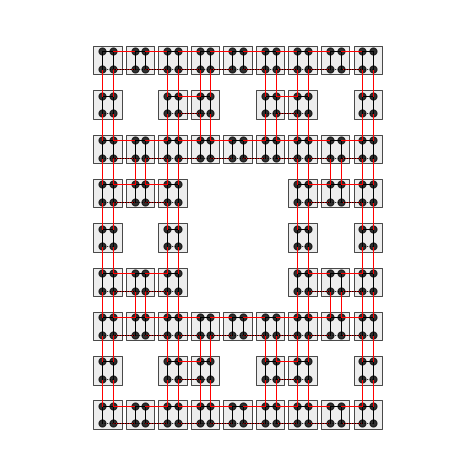

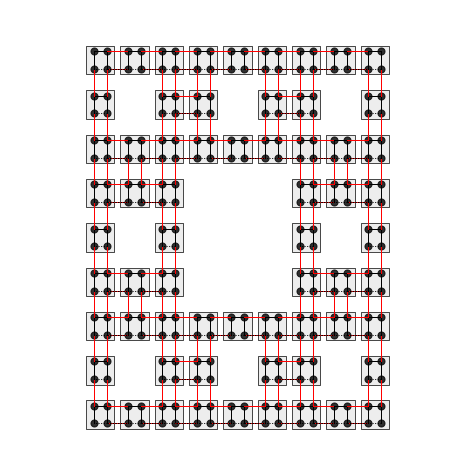

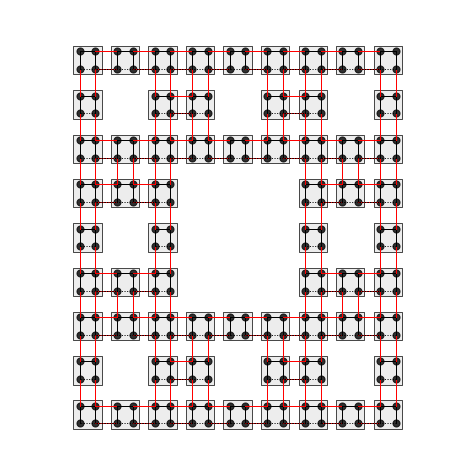

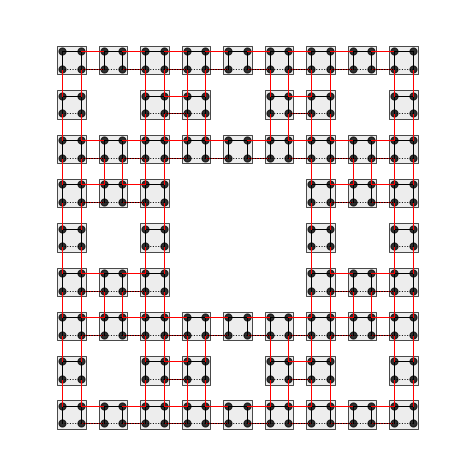

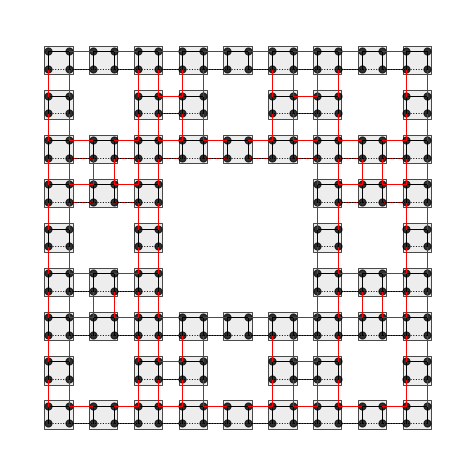

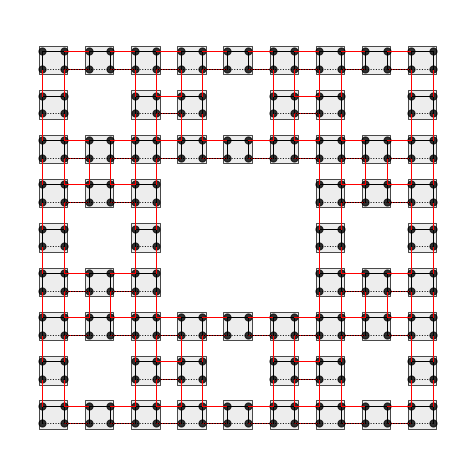

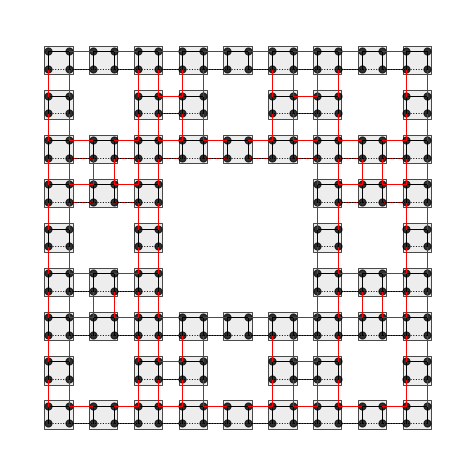

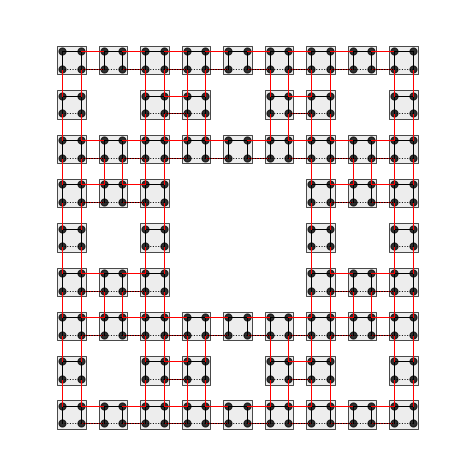

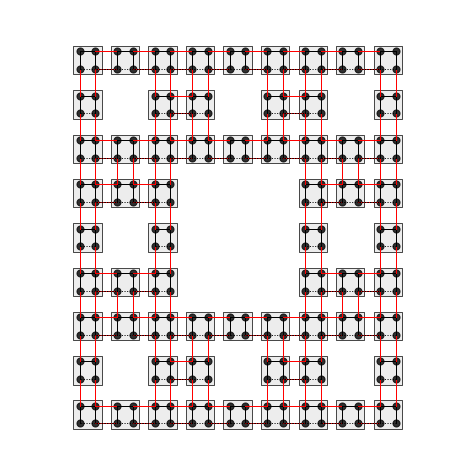

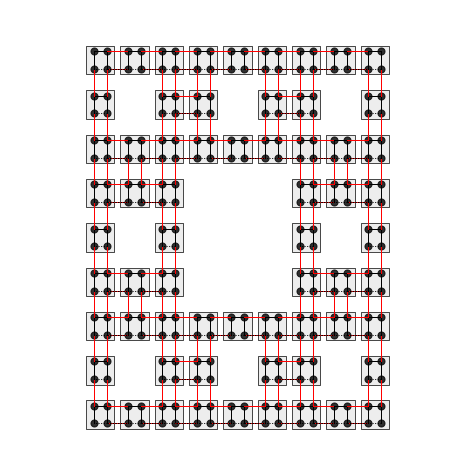

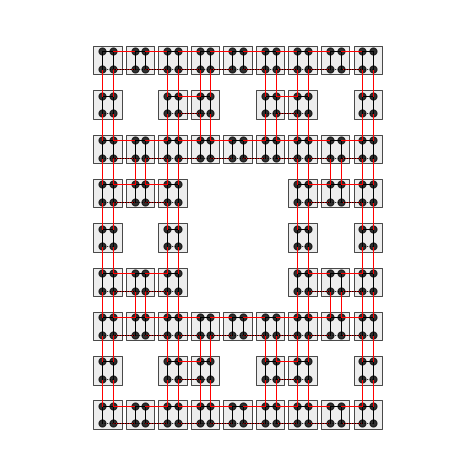

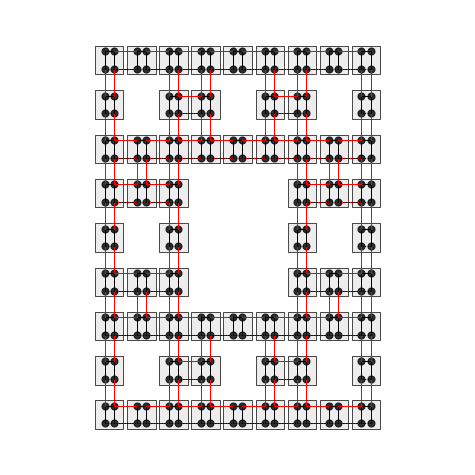

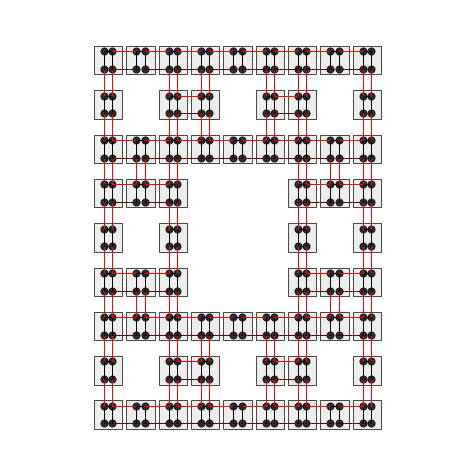

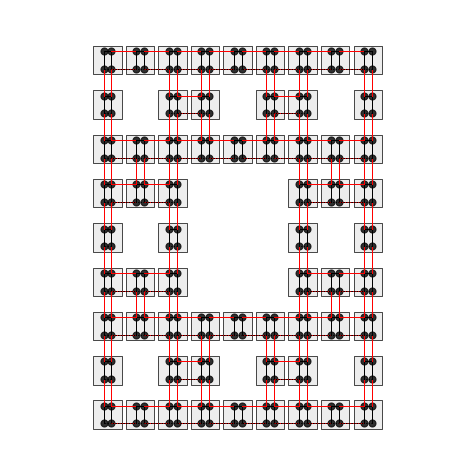

In [18]:
step = 17
name_array = 'LatticeSierpinski_18x18.xyz'
direction = 'x'
name = 'fractal_pump_model_x'
Draw_model_pump(name_array, step, direction, name)

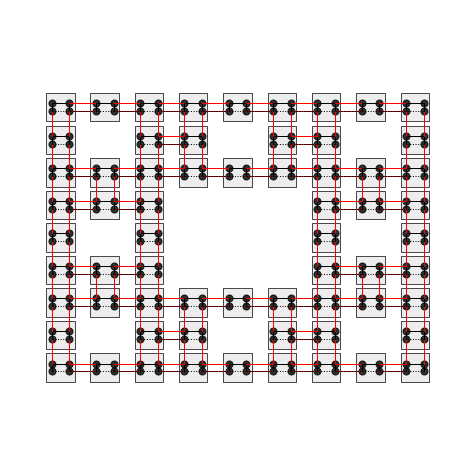

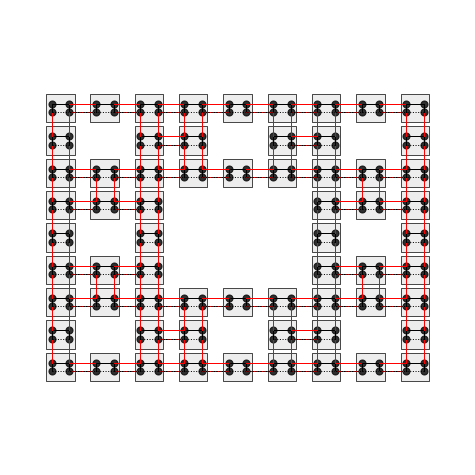

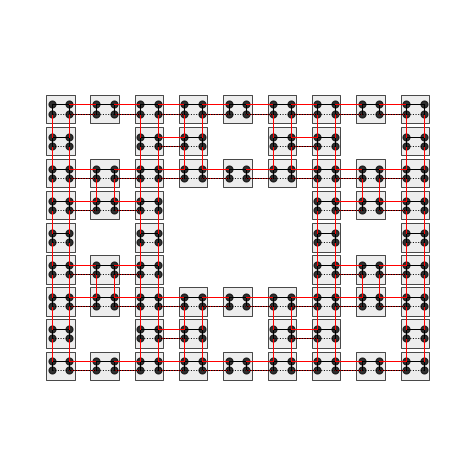

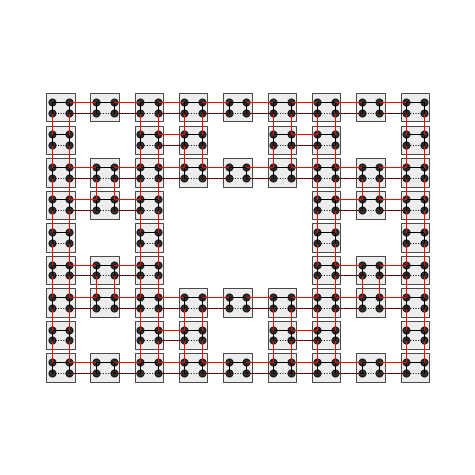

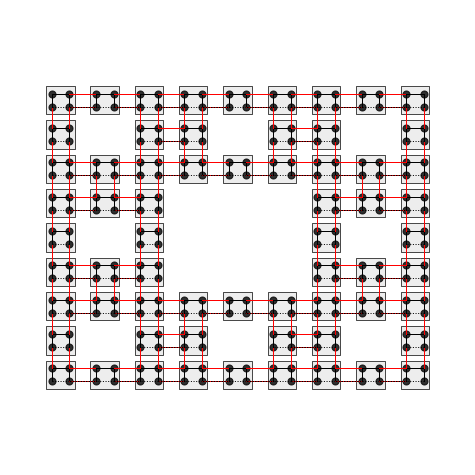

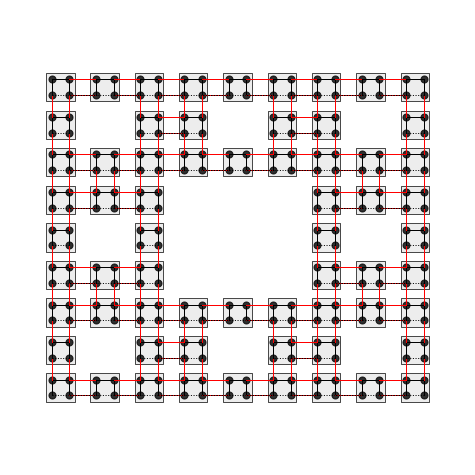

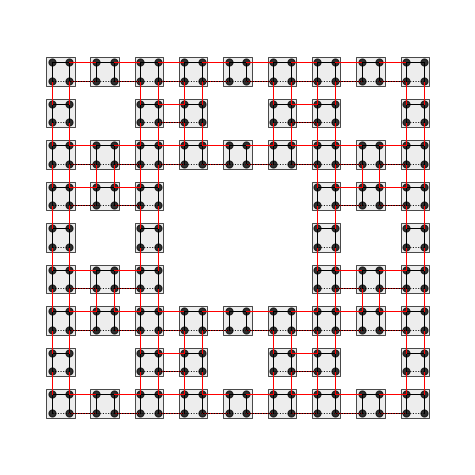

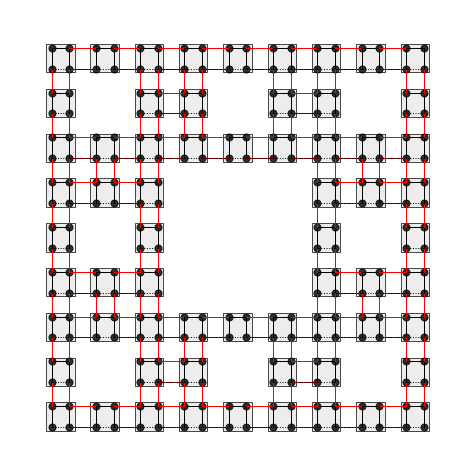

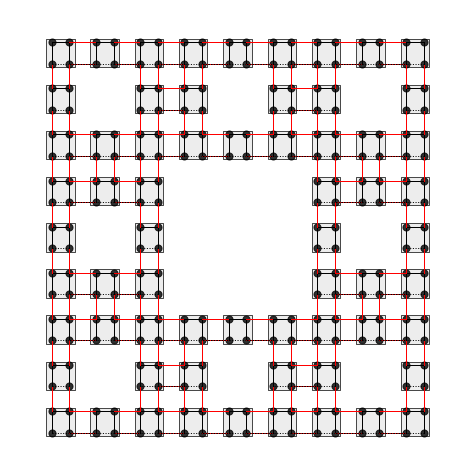

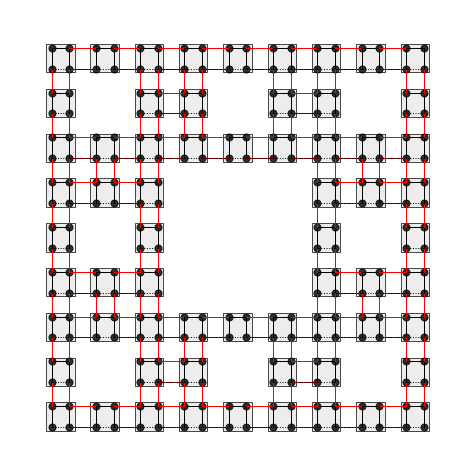

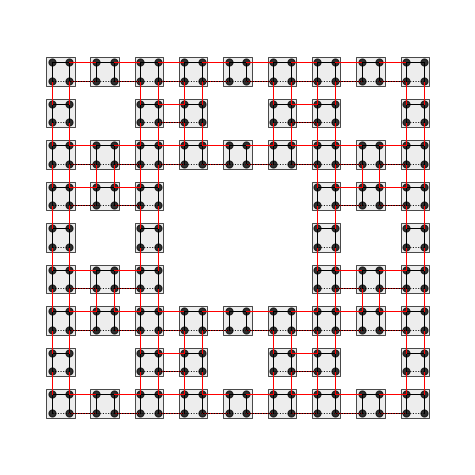

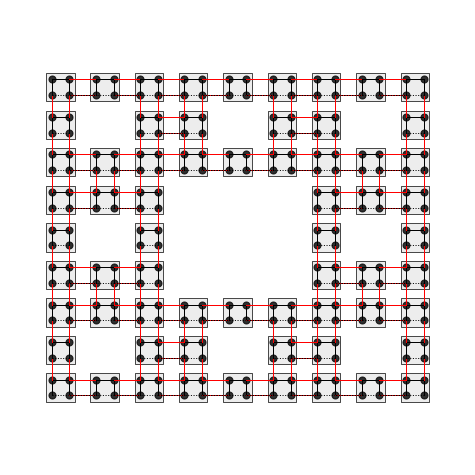

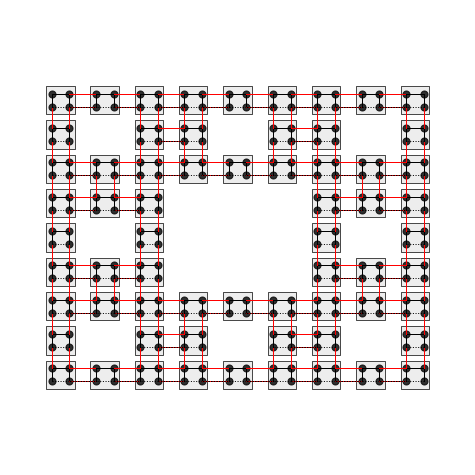

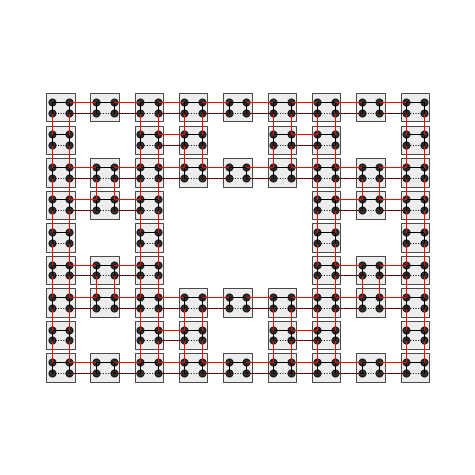

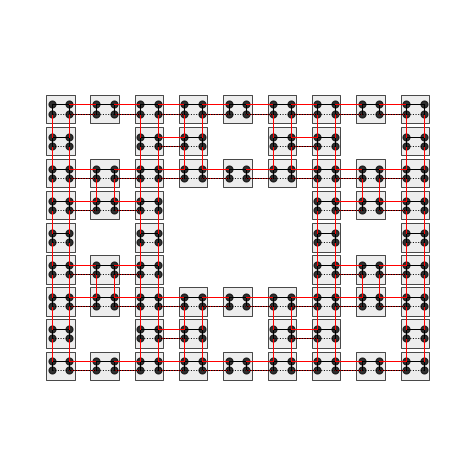

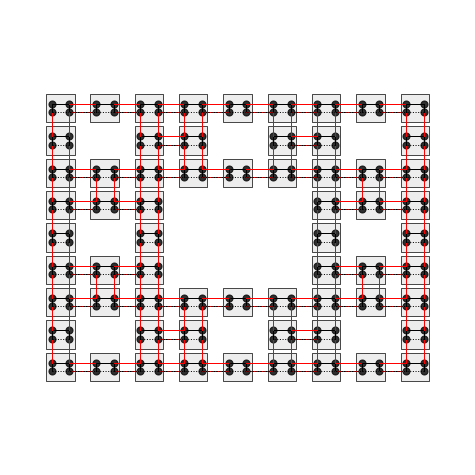

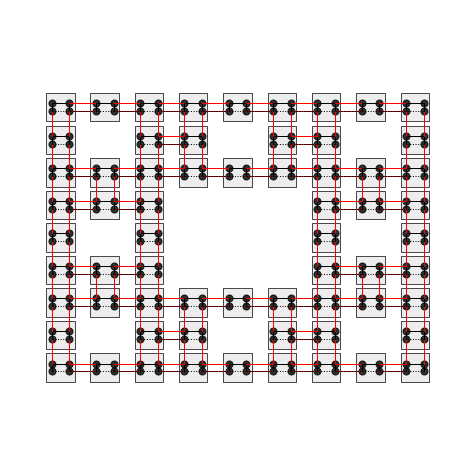

In [19]:
step = 17
name_array = 'LatticeSierpinski_18x18.xyz'
direction = 'y'
name = 'fractal_pump_model_y'
Draw_model_pump(name_array, step, direction, name)

## Figures Fractales

In [20]:
def Sierpinsky_carpet(N,name,l=20):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.add_patch(Rectangle((0,0),l,l, facecolor='black'))
    ax.set_ylim((0,l))
    ax.set_xlim((0,l))
    ax.set_xticks([])
    ax.set_yticks([])
    for n in reversed(range(N)):
        Squares = []
        for i in range(3**n):
            for j in range(3**n):
                h = 3**n
                #colors = ['green','red','blue',]
                if i%3==1 and j%3==1:
                    rec = Rectangle((l*i/h, l*j/h), l/h,l/h,facecolor='white')
                    ax.add_patch(rec)
    fig.savefig('{}.pdf'.format(name))
    plt.show()

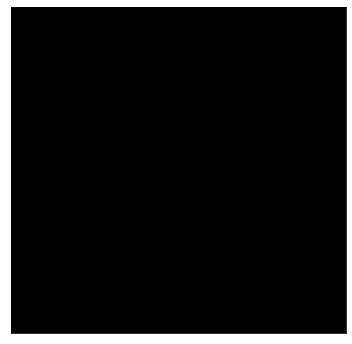

In [21]:
Sierpinsky_carpet(1,'sierpinski_carpet_1')

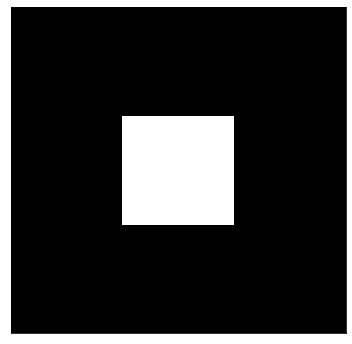

In [22]:
Sierpinsky_carpet(2,'sierpinski_carpet_2')

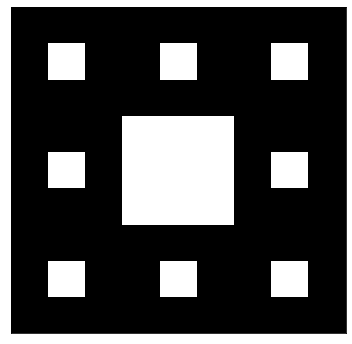

In [23]:
Sierpinsky_carpet(3,'sierpinski_carpet_3')

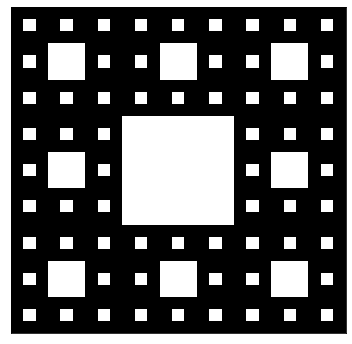

In [24]:
Sierpinsky_carpet(4,'sierpinski_carpet_4')

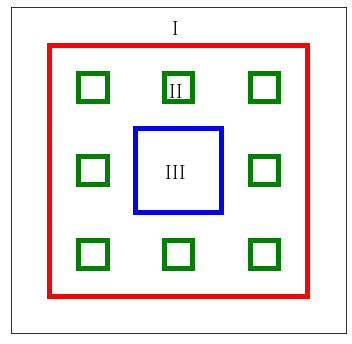

In [27]:
l = 20
name = 'sierpinski_carpet_color'
N = 3
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(Rectangle((0,0),l,l, facecolor='white', edgecolor='red',lw = 5))
ax.set_ylim((-3,l+3))
ax.set_xlim((-3,l+3))
ax.set_xticks([])
ax.set_yticks([])
for n in reversed(range(N)):
    Squares = []
    for i in range(3**n):
        for j in range(3**n):
            h = 3**n
            colors = ['red','blue','green']
            if i%3==1 and j%3==1:
                rec = Rectangle((l*i/h, l*j/h), l/h,l/h,facecolor='white', edgecolor=colors[n], lw=5)
                ax.add_patch(rec)
                
ax.text(9.0,9.3,'III')
ax.text(9.3,15.8,'II')
ax.text(9.5,20.8,'I')
fig.savefig('{}.pdf'.format(name))
plt.show()

In [1]:
def func_cext(θ,A,λ):
    return  λ*exp(-(1+A*cos(θ)))

def func_cint(θ,A,γ):
    return γ*exp(-(1-A*cos(θ)))

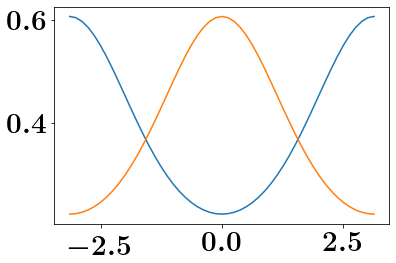

In [6]:
x  = linspace(-pi,pi,51)
ye = func_cext(x,0.5,1.0)  
yi = func_cint(x,0.5,1.0)

plot(x,ye)
plot(x,yi)

#plot(x,yi-ye)